# EDA -> 04

## Sportify Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Q.1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1JVgy2yXUOREkzRdCeWjep626uvvF94pP')

In [3]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [5]:
df_4 = df.copy()
df_4 = df_4.dropna()
df_4 = df_4.drop_duplicates()

In [6]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


In [7]:
df_4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


### Q.2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

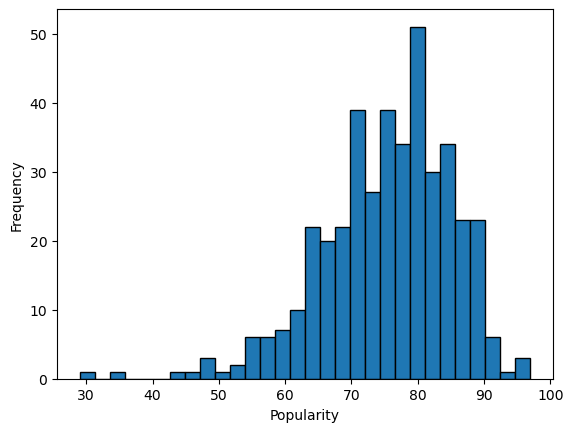

In [8]:
plt.hist(df_4["Popularity"], bins=30, edgecolor='black')
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

### Q.3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

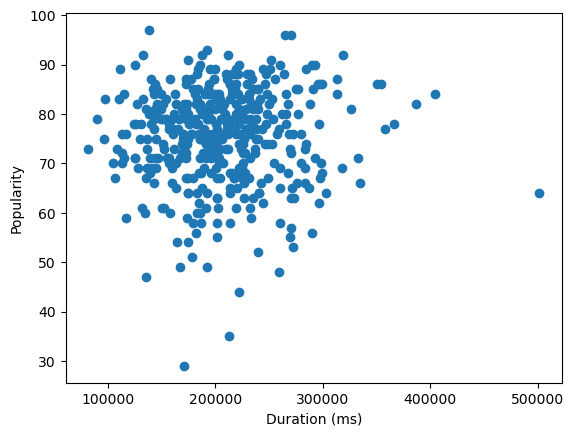

In [9]:
plt.scatter(df_4["Duration (ms)"], df_4["Popularity"])
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

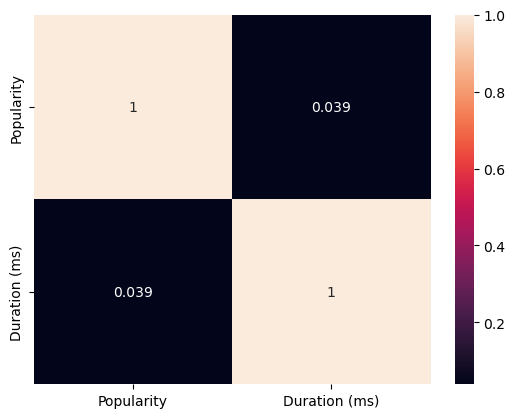

In [10]:
corr = df_4[["Popularity", "Duration (ms)"]].corr()
sns.heatmap(corr,annot=True)
plt.show()

### Q.4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [11]:
df_4.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


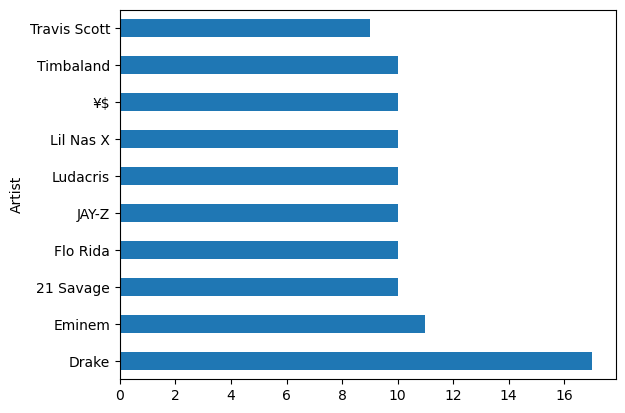

In [12]:
df_4.groupby('Artist')['Track Name'].count().sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

--> Drake has most number of tracks in the dataset

### Q.5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [13]:
df_4.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


### Q.6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [14]:
artist_counts = df_4["Artist"].value_counts()
top5_artists = artist_counts.head(5).index.tolist()

avg_popularity = (
    df_4[df_4["Artist"].isin(top5_artists)]
    .groupby("Artist")["Popularity"]
    .mean()
    .sort_values(ascending=False)
)

print("Average Popularity of top 5 artists:")
print(avg_popularity)


Average Popularity of top 5 artists:
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


### Q.7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [15]:
for artist in top5_artists:
    sub = df_4[df_4["Artist"] == artist]
    best_track = sub.loc[sub["Popularity"].idxmax(), ["Track Name", "Popularity"]]
    print(f"\nArtist: {artist}")
    print("Most popular track:", best_track["Track Name"])
    print("Popularity:", best_track["Popularity"])


Artist: Drake
Most popular track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Popularity: 92

Artist: Eminem
Most popular track: Without Me
Popularity: 90

Artist: Lil Nas X
Most popular track: THATS WHAT I WANT
Popularity: 81

Artist: JAY-Z
Most popular track: Ni**as In Paris
Popularity: 86

Artist: 21 Savage
Most popular track: redrum
Popularity: 96


### Q.8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

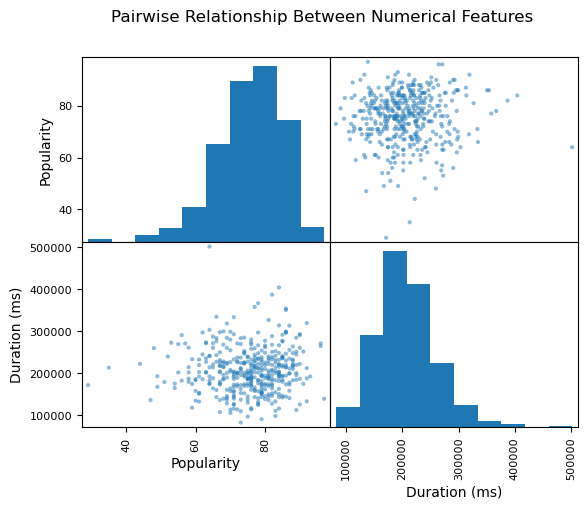

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(
    df_4[["Popularity", "Duration (ms)"]],
    diagonal="hist"
)
plt.suptitle("Pairwise Relationship Between Numerical Features")
plt.show()

### Q.9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

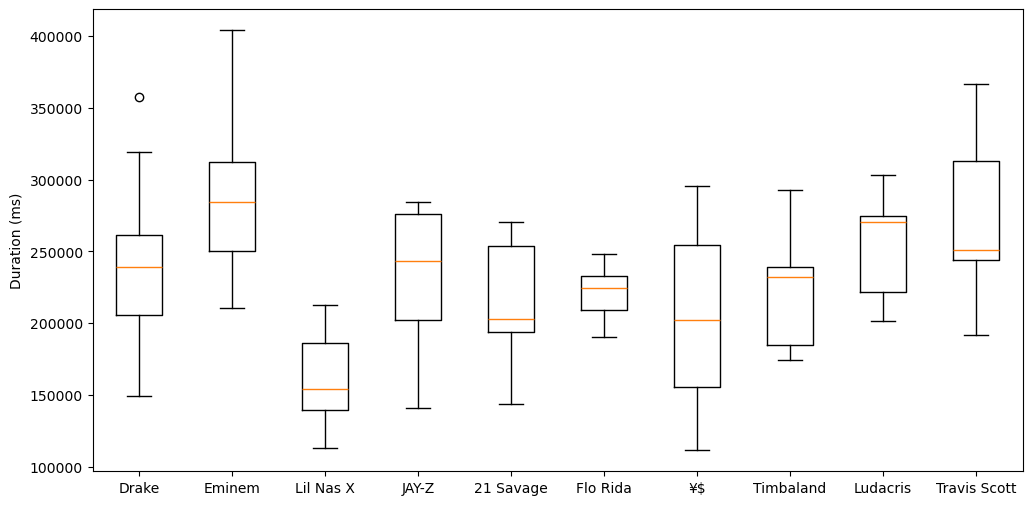

In [17]:
top10_artists = artist_counts.head(10).index.tolist()

duration_data = [
    df_4[df_4["Artist"] == artist]["Duration (ms)"].values
    for artist in top10_artists
]
plt.figure(figsize=(12,6))
plt.boxplot(duration_data, labels=top10_artists)
plt.ylabel("Duration (ms)")
plt.show()

### Q.10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

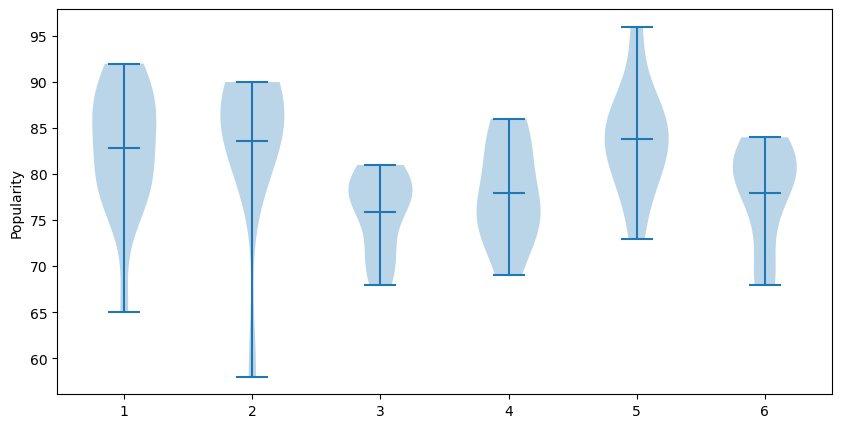

In [19]:
top6 = artist_counts.head(6).index.tolist()

violin_data = [
    df_4[df_4["Artist"] == artist]["Popularity"].values
    for artist in top6]

plt.figure(figsize=(10,5))
plt.violinplot(violin_data, showmeans=True)
plt.ylabel("Popularity")
plt.show()


# "THIS IS END OF THIS EDA -> 04 ASSIGNMENT"